# MODELIZACIÓN PARA CLASIFICACIÓN

**OBSERVACIÓN**:    
En este notebook se realiza la modelización con todas las variables para tener la referencia base.    
En el siguiente notebook se realiza la modelización tan solo con las variables seleccionadas.

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold


#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Alfonso/OneDrive/Documentos_/Formación/Bootcamp_DS/Repo_DS/Proyect_Break_ML/00_PROYECTO_ML'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

 Separo en X,y

In [5]:
target = 'response'
x = df.drop(columns = target).copy()
y =  df[target].copy()
print('X', x.shape)
print('y', y.shape)

X (1479, 35)
y (1479,)


## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [7]:
ratio = float(np.sum(train_y == 0)) / np.sum(train_y == 1)
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1],
         'algoritmo__class_weight': ['balanced']},
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200],
         'algoritmo__class_weight': ['balanced']},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000],
         'algoritmo__scale_pos_weight': [ratio]},
        
        {'algoritmo': [LGBMClassifier(verbose = -1)],
         'algoritmo__max_depth': [3,5, 7],
         'algoritmo__min_child_samples': [2,4,8],
         'algoritmo__min_child_weight': [4,8,14],
         'algoritmo__learning_rate': [0.01,0.02,0.06],
         'algoritmo__n_estimators': [100,200,400],
         'algoritmo__is_unbalance' : [True],
         'algoritmo__objective': ['binary']}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                        cv = 5, 
                           scoring = make_scorer(recall_score, pos_label=1),
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__class_weight,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__max_depth,...,param_algoritmo__objective,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.10,0.05,0.01,0.01,LogisticRegression(),0.75,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.83,0.77,0.87,0.60,0.77,0.77,0.09,1
18,0.09,0.01,0.01,0.01,LogisticRegression(),1,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.83,0.77,0.87,0.57,0.77,0.76,0.10,2
10,0.07,0.02,0.01,0.00,LogisticRegression(),0.50,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.83,0.73,0.87,0.60,0.77,0.76,0.09,2
5,0.15,0.06,0.01,0.00,LogisticRegression(),0.25,balanced,l1,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.77,0.73,0.87,0.60,0.80,0.75,0.09,4
6,0.06,0.01,0.03,0.02,LogisticRegression(),0.25,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.80,0.73,0.87,0.60,0.77,0.75,0.09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.00,0.00,0.00,0.00,LogisticRegression(),0.25,balanced,elasticnet,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,693
3,0.00,0.00,0.00,0.00,LogisticRegression(),0,balanced,none,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,693
2,0.00,0.00,0.00,0.00,LogisticRegression(),0,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,693
1,0.01,0.01,0.00,0.00,LogisticRegression(),0,balanced,l1,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,693


In [9]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)
df_cv_results[['param_algoritmo','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_algoritmo,mean_test_score,std_test_score,rank_test_score
14,LogisticRegression(),0.77,0.09,1
18,LogisticRegression(),0.76,0.10,2
10,LogisticRegression(),0.76,0.09,2
5,LogisticRegression(),0.75,0.09,4
6,LogisticRegression(),0.75,0.09,4
...,...,...,...,...
4,LogisticRegression(),NaN,NaN,693
3,LogisticRegression(),NaN,NaN,693
2,LogisticRegression(),NaN,NaN,693
1,LogisticRegression(),NaN,NaN,693


In [10]:
grid_search.best_params_

{'algoritmo': LogisticRegression(),
 'algoritmo__C': 0.75,
 'algoritmo__class_weight': 'balanced',
 'algoritmo__penalty': 'l2',
 'algoritmo__solver': 'saga'}

## EVALUAR

### Predecir sobre validación

In [12]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [13]:
roc_auc_score(val_y, pred)

0.8359021183345509

### Classification report

In [14]:
# Obtienes las predicciones de clase final
pred_final = modelo.best_estimator_.predict(val_x)

print(classification_report(val_y,pred_final))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       370
           1       0.41      0.74      0.53        74

    accuracy                           0.78       444
   macro avg       0.67      0.76      0.69       444
weighted avg       0.85      0.78      0.80       444



### Matriz de confusion

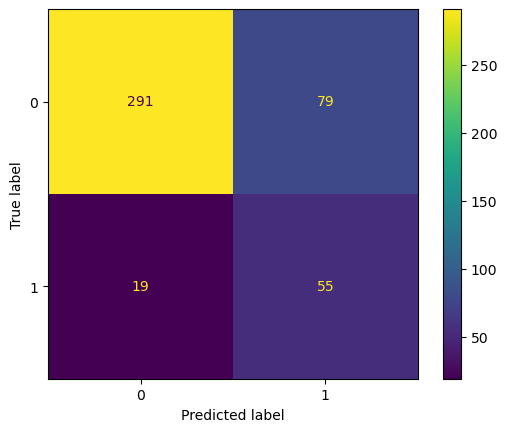

In [15]:
# Calculas la matriz de confusión
cm = confusion_matrix(val_y, pred_final)

# Visualizas la matriz de confusión
ConfusionMatrixDisplay(cm).plot()


### Examinar el mejor modelo

In [16]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.75, class_weight='balanced',
                                    solver='saga'))])

## REPORTING DEL MODELO

### Gain Chart

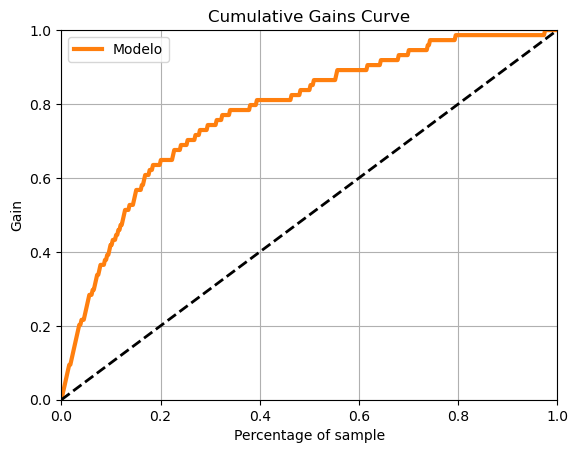

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

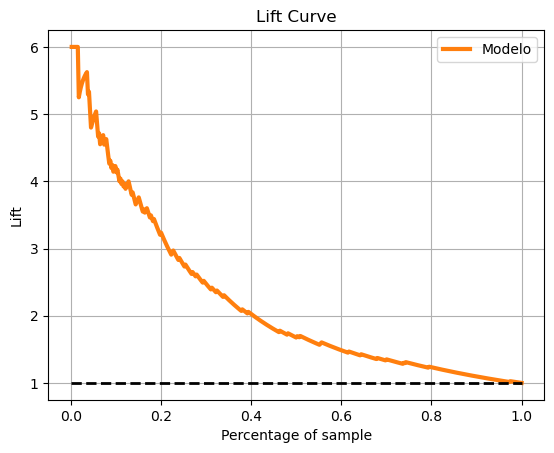

In [18]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

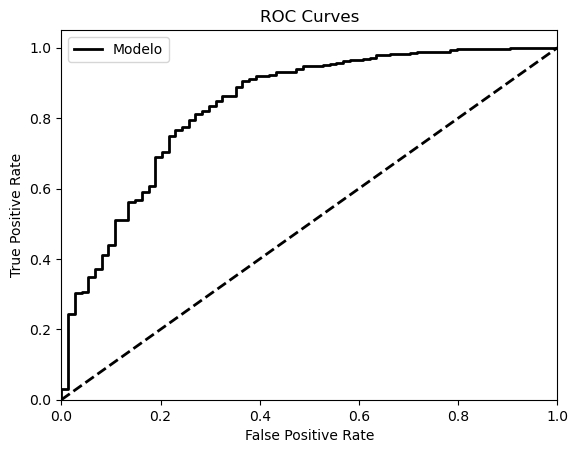

In [19]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();
